In [1]:
#import packages
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#picking a start date around ~3 years ago
startdate = '2018-01-01'

#downloading stocks
AMAT = pdr.DataReader('AMAT','yahoo',startdate)
FB = pdr.DataReader('FB','yahoo',startdate)
TER = pdr.DataReader('TER','yahoo',startdate)
AMD = pdr.DataReader('AMD','yahoo',startdate)

In [11]:
#Portfolio Optimiation
portfolio = pd.concat([AMAT['Adj Close'],FB['Adj Close'],TER['Adj Close'],AMD['Adj Close']], axis=1)
portfolio.columns = ['AMAT','FB','TER','AMD']

In [12]:
#log return for returns
log_return = np.log(portfolio/portfolio.shift())
log_return

,AMAT,FB,TER,AMD
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,0.017567,0.017756,0.004291,0.050610
2018-01-04,0.005727,-0.001843,0.004722,0.048172
2018-01-05,0.005694,0.013579,0.022842,-0.020001
2018-01-08,0.023888,0.007624,0.012636,0.033116
...,...,...,...,...
2020-10-30,-0.004548,-0.065177,-0.007824,-0.035618
2020-11-02,0.018401,-0.006673,0.020840,-0.007867
2020-11-03,0.024559,0.014963,0.001448,0.024856


In [13]:
#Name of stocks in portfolio
print(portfolio.columns)

weights = np.full((1, len(portfolio.columns)), 1/len(portfolio.columns))[0]
print("Weights")
print(weights)

#expect returns
print('Expected returns')
exp_return = np.sum((log_return.mean()*weights)*252)
print(exp_return)

#expected STD/volatility
print('Expected volatility')
exp_volatility = np.sqrt(np.dot(weights.T, np.dot(log_return.cov()*252, weights)))
print(exp_volatility)

#Shape ratio
print('Shape ratio')
Sharpe_Ratio = exp_return/exp_volatility
print(Sharpe_Ratio)

Index(['AMAT', 'FB', 'TER', 'AMD'], dtype='object')
Weights
[0.25 0.25 0.25 0.25]
Expected returns
0.32158652522477704
Expected volatility
0.38301700303559233
Shape ratio
0.8396142277654791


In [19]:
#Running 10k simulations for portfolio
number_ports = 10000
all_weights = np.zeros((number_ports, len(portfolio.columns)))
returns_array = np.zeros(number_ports)
volatility_array = np.zeros(number_ports)
sharpe_array = np.zeros(number_ports)

np.random.seed(4)

for index in range(number_ports):
  #weights
  weights = np.array(np.random.random(4))
  weights = weights/np.sum(weights)

  #save weights
  all_weights[index,:] = weights

  #expected returns
  returns_array[index] = np.sum((log_return.mean()*weights)*252)

  #expected volatiltiy
  volatility_array[index] = np.sqrt(np.dot(weights.T, np.dot(log_return.cov()*252, weights)))

  #sharpe ratio
  sharpe_array[index] = returns_array[index]/volatility_array[index]

In [20]:
#find highest sharpe ratio
sharpe_array.max()

1.189806230601032

In [21]:
#find shape weights by index
index_max_shape = sharpe_array.argmax()
index_max_shape

4947

In [22]:
#look at the weights from the index
weights_array = all_weights[index_max_shape,:]
weights_array

array([6.28387986e-03, 8.90219202e-04, 8.23253820e-02, 9.10500519e-01])

In [23]:
#positions of the stocks from the weights
portfolio.columns

Index(['AMAT', 'FB', 'TER', 'AMD'], dtype='object')

In [26]:
#making a nice dataframe format
weights_list = list(zip(portfolio.columns, weights_array))

#convert list to dataframe
weight_df = pd.DataFrame(weights_list, columns=['Ticker','Weight'])
weight_df.sort_values(by="Weight",ascending=False)

,Ticker,Weight
3,AMD,0.910501
2,TER,0.082325
0,AMAT,0.006284
1,FB,0.000890


Text(0, 0.5, 'returns')

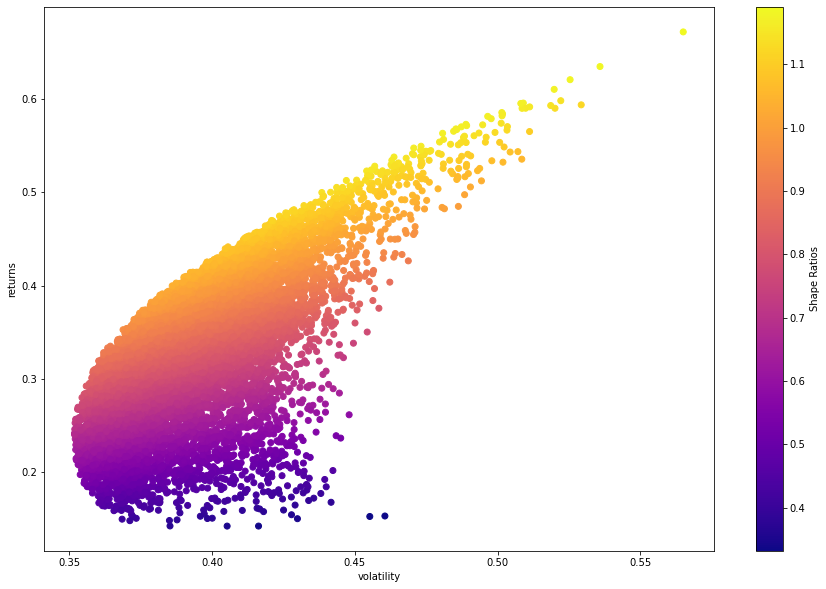

In [27]:
#plot efficent frontier heatmap
plt.figure(figsize=(15,10))
plt.scatter(volatility_array,returns_array,c=sharpe_array,cmap='plasma')
plt.colorbar(label='Shape Ratios')
plt.xlabel('volatility')
plt.ylabel('returns')

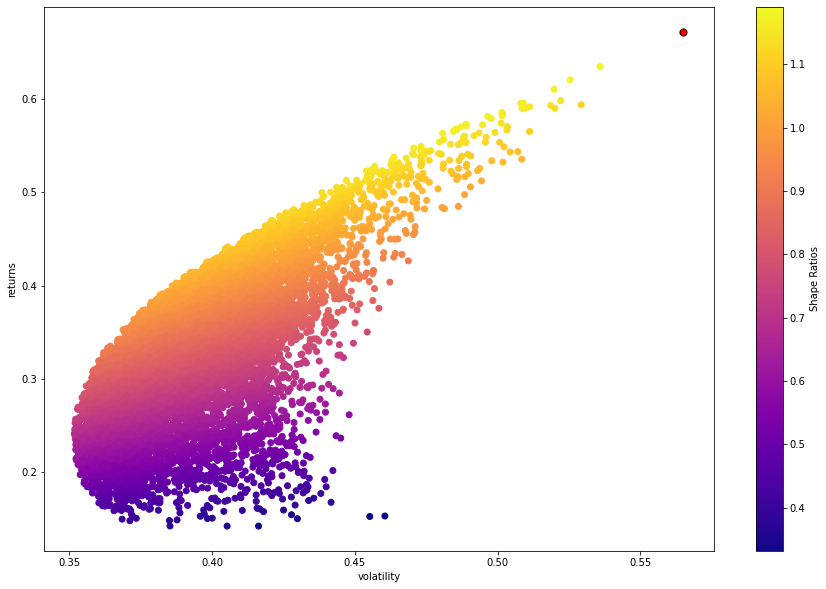

In [28]:
## Finding our portfolio
#plot efficent frontier heatmap
plt.figure(figsize=(15,10))
plt.scatter(volatility_array,returns_array,c=sharpe_array,cmap='plasma')
plt.colorbar(label='Shape Ratios')
plt.xlabel('volatility')
plt.ylabel('returns')

#finding the optimal portfolio sharpe
max_shape_return = returns_array[index_max_shape]
max_shape_volatility = volatility_array[index_max_shape]

#add a red dot
plt.scatter(max_shape_volatility, max_shape_return, c='red', s=50, edgecolors='black')